In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

# LOADING THE DATA AND DOING SOME ANALYSIS

In [4]:
train_data = pd.read_csv("Train.csv")
test_data = pd.read_csv('Test.csv')
sample_sub = pd.read_csv('SampleSubmission.csv')
var_desc = pd.read_csv('variable_descriptions.csv')

In [5]:
pd.set_option('display.max_colwidth', 200) # So that we can see the full descriptions
var_desc

,Column,Description,Unnamed: 2,Unnamed: 3
0,dw_00,Percentage of dwellings of type: House or brick/concrete block structure on a separate stand or yard or on a farm,NaN,NaN
1,dw_01,Percentage of dwellings of type: Traditional dwelling/hut/structure made of traditional materials,NaN,NaN
2,dw_02,Percentage of dwellings of type: Flat or apartment in a block of flats,NaN,NaN
3,dw_03,Percentage of dwellings of type: Cluster house in complex,NaN,NaN
4,dw_04,Percentage of dwellings of type: Townhouse (semi-detached house in a complex),NaN,NaN
5,dw_05,Percentage of dwellings of type: Semi-detached house,NaN,NaN
6,dw_06,Percentage of dwellings of type: House/flat/room in backyard,NaN,NaN
7,dw_07,Percentage of dwellings of type: Informal dwelling (shack,in backyard),NaN
8,dw_08,Percentage of dwellings of type: Informal dwelling (shack,not in backyard,e.g. in an informal/squatter settlement or on a farm)
9,dw_09,Percentage of dwellings of type: Room/flatlet on a property or larger dwelling/servants quarters/granny flat,NaN,NaN


In [6]:
train_data.head()

,ward,total_households,total_individuals,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,...,pw_03,pw_04,pw_05,pw_06,pw_07,pw_08,ADM4_PCODE,lat,lon,NL
0,41601001: Ward 1,1674.45058,5888.20750,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,...,0.002848,0.007537,0.000000,0.012928,0,0,ZA4161001,-29.682270,24.734743,0.292039
1,41601002: Ward 2,1736.99230,6735.33812,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,...,0.014566,0.057127,0.019092,0.004131,0,0,ZA4161002,-29.119311,24.757737,3.207775
2,41601003: Ward 3,2403.57591,7273.04995,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,...,0.057560,0.010358,0.001421,0.040881,0,0,ZA4161003,-29.142276,25.094093,0.000000
3,41601004: Ward 4,1740.78737,5734.49046,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,...,0.000000,0.000669,0.000000,0.005011,0,0,ZA4161004,-29.372052,24.942867,2.038778
4,41601005: Ward 5,1730.51451,6657.23835,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,...,0.004859,0.001290,0.000673,0.017629,0,0,ZA4161005,-29.409381,25.290165,0.000000


In [7]:
train_data.shape

(2822, 63)

In [8]:
test_data.shape

(1013, 62)

In [9]:
train_data.columns

Index(['ward', 'total_households', 'total_individuals', 'target', 'dw_00',
       'dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07', 'dw_08',
       'dw_09', 'dw_10', 'dw_11', 'dw_12', 'dw_13', 'psa_00', 'psa_01',
       'psa_02', 'psa_03', 'psa_04', 'stv_00', 'stv_01', 'car_00', 'car_01',
       'lln_00', 'lln_01', 'lan_00', 'lan_01', 'lan_02', 'lan_03', 'lan_04',
       'lan_05', 'lan_06', 'lan_07', 'lan_08', 'lan_09', 'lan_10', 'lan_11',
       'lan_12', 'lan_13', 'lan_14', 'pg_00', 'pg_01', 'pg_02', 'pg_03',
       'pg_04', 'lgt_00', 'pw_00', 'pw_01', 'pw_02', 'pw_03', 'pw_04', 'pw_05',
       'pw_06', 'pw_07', 'pw_08', 'ADM4_PCODE', 'lat', 'lon', 'NL'],
      dtype='object')

In [10]:
test_data.columns

Index(['ward', 'total_households', 'total_individuals', 'dw_00', 'dw_01',
       'dw_02', 'dw_03', 'dw_04', 'dw_05', 'dw_06', 'dw_07', 'dw_08', 'dw_09',
       'dw_10', 'dw_11', 'dw_12', 'dw_13', 'psa_00', 'psa_01', 'psa_02',
       'psa_03', 'psa_04', 'stv_00', 'stv_01', 'car_00', 'car_01', 'lln_00',
       'lln_01', 'lan_00', 'lan_01', 'lan_02', 'lan_03', 'lan_04', 'lan_05',
       'lan_06', 'lan_07', 'lan_08', 'lan_09', 'lan_10', 'lan_11', 'lan_12',
       'lan_13', 'lan_14', 'pg_00', 'pg_01', 'pg_02', 'pg_03', 'pg_04',
       'lgt_00', 'pw_00', 'pw_01', 'pw_02', 'pw_03', 'pw_04', 'pw_05', 'pw_06',
       'pw_07', 'pw_08', 'ADM4_PCODE', 'lat', 'lon', 'NL'],
      dtype='object')

<AxesSubplot:>

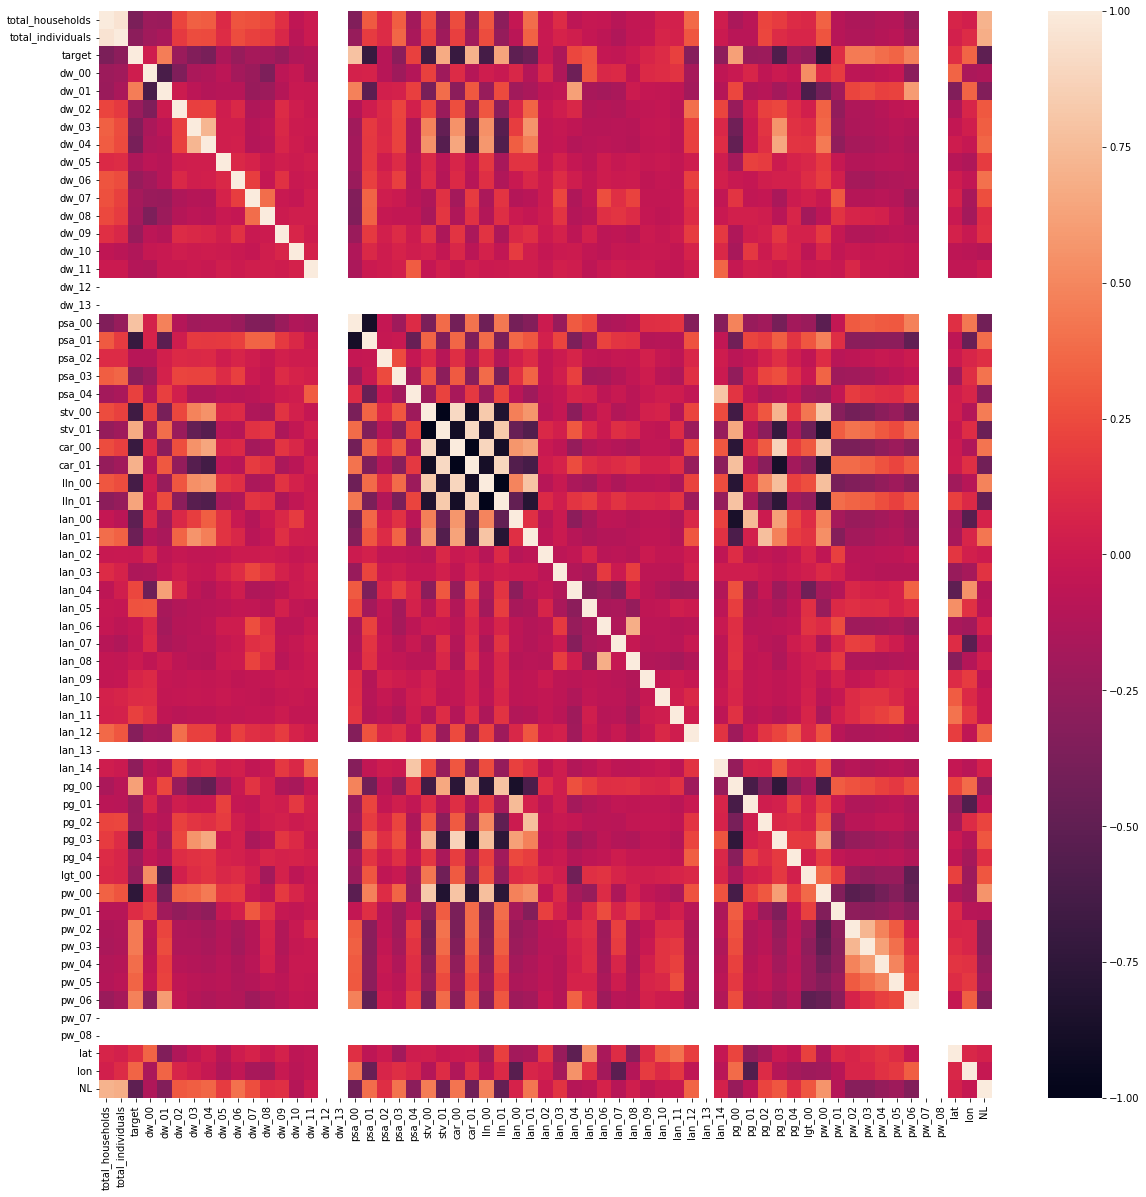

In [11]:
plt.figure(figsize=(20,20))
sns.heatmap(train_data.corr())

## Positive and Negative correlations

In [12]:
train_data.corr()['target'].sort_values(ascending=False).head(10)

target    1.000000
psa_00    0.782472
car_01    0.702831
stv_01    0.664181
lln_01    0.637835
pg_00     0.613346
pw_06     0.470676
dw_01     0.458206
pw_02     0.442441
pw_03     0.440941
Name: target, dtype: float64

In [13]:
train_data.corr()['target'].sort_values(ascending=True).head(10)

pw_00    -0.754536
psa_01   -0.707506
car_00   -0.702831
stv_00   -0.664181
lln_00   -0.637835
pg_03    -0.583908
NL       -0.514398
lan_00   -0.507942
lan_01   -0.438704
dw_04    -0.385533
Name: target, dtype: float64

# ClEANING THE DATA (DELETING COLUMNS CONTAINING JUST 0)

In [14]:
for i in list(train_data):
    if ((train_data[i]==0).all()):
        print(i)
        del train_data[i]

dw_12
dw_13
lan_13
pw_07
pw_08


In [15]:
for i in list(test_data):
    if ((test_data[i]==0).all()):
        print(i)
        del test_data[i]

dw_12
dw_13
lan_13
pw_07
pw_08


## Concatinating the test and train data for feature engineering

In [16]:
len_train= len(train_data)
full_data = pd.concat([train_data, test_data])

### Scaling the variables total households and total individuals

In [17]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()

full_data['scaled_total_households'] = min_max_scaler.fit_transform(full_data['total_households'].values.reshape(-1,1))
full_data['scaled_total_individuals'] = min_max_scaler.fit_transform(full_data['total_individuals'].values.reshape(-1,1))


full_data  = full_data.drop('total_households', axis=1)
full_data  = full_data.drop('total_individuals', axis=1)


### Adding two variables poor and rich (Poor:Doesn't have car satellite and did not attend school and the opposite for )

In [18]:
full_data['poor'] = full_data['psa_01']+full_data['car_01']+full_data['stv_00']
full_data['rich'] = full_data['psa_00']+full_data['car_00'] + full_data['stv_01']

In [19]:
full_data.columns

Index(['ward', 'target', 'dw_00', 'dw_01', 'dw_02', 'dw_03', 'dw_04', 'dw_05',
       'dw_06', 'dw_07', 'dw_08', 'dw_09', 'dw_10', 'dw_11', 'psa_00',
       'psa_01', 'psa_02', 'psa_03', 'psa_04', 'stv_00', 'stv_01', 'car_00',
       'car_01', 'lln_00', 'lln_01', 'lan_00', 'lan_01', 'lan_02', 'lan_03',
       'lan_04', 'lan_05', 'lan_06', 'lan_07', 'lan_08', 'lan_09', 'lan_10',
       'lan_11', 'lan_12', 'lan_14', 'pg_00', 'pg_01', 'pg_02', 'pg_03',
       'pg_04', 'lgt_00', 'pw_00', 'pw_01', 'pw_02', 'pw_03', 'pw_04', 'pw_05',
       'pw_06', 'ADM4_PCODE', 'lat', 'lon', 'NL', 'scaled_total_households',
       'scaled_total_individuals', 'poor', 'rich'],
      dtype='object')

In [20]:
#Manhattan distnace
def manhattan_distance(lat, lon):
    a = np.abs(lat -lon)
    return a

full_data['manhattan_dist'] = manhattan_distance(full_data['lon'].values, full_data['lat'].values,)

full_data['scaled_manhattan_dist'] = min_max_scaler.fit_transform(full_data['manhattan_dist'].values.reshape(-1,1))
full_data  = full_data.drop('manhattan_dist', axis=1)


In [21]:
full_data.head()

,ward,target,dw_00,dw_01,dw_02,dw_03,dw_04,dw_05,dw_06,dw_07,...,pw_06,ADM4_PCODE,lat,lon,NL,scaled_total_households,scaled_total_individuals,poor,rich,scaled_manhattan_dist
0,41601001: Ward 1,16.773757,0.933841,0.000846,0.005490,0.000676,0.000000,0.001372,0.005750,0.031466,...,0.012928,ZA4161001,-29.682270,24.734743,0.292039,0.042169,0.060514,1.617639,1.250451,0.565712
1,41601002: Ward 2,21.496661,0.696940,0.001253,0.004402,0.000000,0.002301,0.001323,0.007575,0.123547,...,0.004131,ZA4161002,-29.119311,24.757737,3.207775,0.043745,0.069786,1.508791,1.331225,0.531342
2,41601003: Ward 3,10.931425,0.810545,0.004517,0.008891,0.003986,0.007735,0.000956,0.006686,0.022632,...,0.040881,ZA4161003,-29.142276,25.094093,0.000000,0.060543,0.075672,1.570556,1.292883,0.554214
3,41601004: Ward 4,23.119257,0.659914,0.000000,0.006129,0.000000,0.000813,0.037245,0.005255,0.068909,...,0.005011,ZA4161004,-29.372052,24.942867,2.038778,0.043841,0.058831,1.553173,1.321336,0.559213
4,41601005: Ward 5,13.652252,0.950575,0.000655,0.001473,0.000598,0.006999,0.000818,0.004985,0.009150,...,0.017629,ZA4161005,-29.409381,25.290165,0.000000,0.043582,0.068931,1.459046,1.255219,0.583696


In [22]:
train = full_data[:len_train]
test = full_data[len_train:]
test.drop("target",axis=1, inplace=True)

In [23]:
target= train_data["target"]
train =train.drop(["ADM4_PCODE",'ward','target'], axis=1)
ward = test_data["ward"]
test= test.drop(["ADM4_PCODE",'ward' ], axis=1)

In [24]:
X = train
y= target

In [33]:
from sklearn.metrics import mean_squared_error
from math import sqrt
from catboost import CatBoostRegressor
from sklearn.model_selection import KFold

errcb=[]
y_pred_cat=[]
fold=KFold(n_splits=5)
i=1
for train_index, test_index in fold.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y[train_index], y[test_index]
    m=CatBoostRegressor(n_estimators=800,eval_metric='RMSE', max_depth=4,learning_rate=0.1,
                        subsample=0.9,bootstrap_type='Bernoulli',
                        use_best_model=True)

    m.fit(X_train,y_train,eval_set=[(X_train,y_train),(X_test, y_test)],early_stopping_rounds=100,verbose=100)
    preds=m.predict(X_test)
    print("err: ",np.sqrt(mean_squared_error(y_test,preds)))
    errcb.append(sqrt(mean_squared_error(y_test,preds)))
    p = m.predict(test)
    y_pred_cat.append(p)

0:	learn: 9.7321651	test: 9.7321651	test1: 9.2191894	best: 9.2191894 (0)	total: 6.24ms	remaining: 4.99s
100:	learn: 3.1872394	test: 3.1872394	test1: 4.0117007	best: 4.0117007 (100)	total: 538ms	remaining: 3.72s
200:	learn: 2.5500868	test: 2.5500868	test1: 3.7726351	best: 3.7724399 (199)	total: 905ms	remaining: 2.69s
300:	learn: 2.1562210	test: 2.1562210	test1: 3.6505168	best: 3.6476538 (294)	total: 1.28s	remaining: 2.13s
400:	learn: 1.8607436	test: 1.8607436	test1: 3.5961177	best: 3.5910766 (384)	total: 1.69s	remaining: 1.69s
500:	learn: 1.6291459	test: 1.6291459	test1: 3.5939283	best: 3.5850261 (481)	total: 2.01s	remaining: 1.2s
600:	learn: 1.4249118	test: 1.4249118	test1: 3.5634808	best: 3.5629864 (598)	total: 2.39s	remaining: 790ms
700:	learn: 1.2659966	test: 1.2659966	test1: 3.5394717	best: 3.5394717 (700)	total: 2.71s	remaining: 383ms
799:	learn: 1.1250219	test: 1.1250219	test1: 3.5465596	best: 3.5363890 (705)	total: 3.04s	remaining: 0us

bestTest = 3.536389041
bestIteration = 705

In [35]:
d = {"ward": ward, 'target': np.mean(y_pred_cat, 0)}
test_predictions = pd.DataFrame(data=d)
test_predictions = test_predictions[["ward", 'target']]
test_predictions.to_csv('catboost.csv', index=False)